In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("The-Ramen-Rater-The-Big-List-1-3400-Current-As-Of-Jan-25-2020.xlsx")

In [3]:
df.shape

(3400, 6)

In [4]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars
0,3400,EDO Pack,Kumamoto Flavour Noodles,Cup,Hong Kong,1
1,3399,Pan Mee,Goreng Dried Chili Shrimp Flavour,Pack,Malaysia,5
2,3398,Paldo,King Lid Ramen Noodle Soup,Pack,South Korea,5
3,3397,Nissin Miojo,Cremoso Carno Com Chili,Pack,Brazil,2
4,3396,Samyang Foods,Cham Ramen Big Bowl,Bowl,South Korea,2.25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
Review #    3400 non-null int64
Brand       3400 non-null object
Variety     3400 non-null object
Style       3400 non-null object
Country     3400 non-null object
Stars       3400 non-null object
dtypes: int64(1), object(5)
memory usage: 159.5+ KB


In [6]:
df.describe()

,Review #
count,3400.000000
mean,1700.500000
std,981.639785
min,1.000000
25%,850.750000
50%,1700.500000
75%,2550.250000
max,3400.000000


In [7]:
df.isnull().sum()

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
dtype: int64

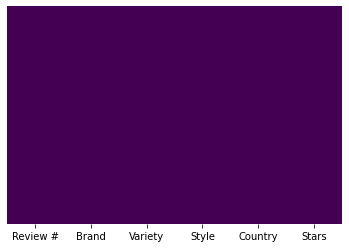

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
df.isna().sum() / len(df)*100

Review #    0.0
Brand       0.0
Variety     0.0
Style       0.0
Country     0.0
Stars       0.0
dtype: float64

In [10]:
df['Style'].unique()

array(['Cup', 'Pack', 'Bowl', 'Tray', 'Box', 'Restaurant', 'Can', 'Bar'],
      dtype=object)

In [11]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars
0,3400,EDO Pack,Kumamoto Flavour Noodles,Cup,Hong Kong,1
1,3399,Pan Mee,Goreng Dried Chili Shrimp Flavour,Pack,Malaysia,5
2,3398,Paldo,King Lid Ramen Noodle Soup,Pack,South Korea,5
3,3397,Nissin Miojo,Cremoso Carno Com Chili,Pack,Brazil,2
4,3396,Samyang Foods,Cham Ramen Big Bowl,Bowl,South Korea,2.25


In [12]:
df['Bad_Stars'] = df['Stars'].apply(lambda x: not (isinstance(x,int) or isinstance(x,float))) 

In [14]:
#filter df by stars is instance string
# Turns out Nona Lim has a few products where the noodles and the broth are sold separately and paired according to taste.
# That's why there are two separate scores listed. It wouldn't be unfair to average the scores

# A few of the unrated noodles are plain noodles. No broth and no seasoning. That's cool didn't know that existed. Good for hotpot or adding extra noodles to soup.

# The ones that look like datetimes are a weird Excel formatting issue where 4/4 got treated as a date rather than two scores
# We cna either go edit the format in Excel, but we won't miss 3 data points. DELETE

# Turns out for example Review 2641 is actually a toy 
# https://www.theramenrater.com/2017/12/06/2642-nanoblcok-ramen_nbc_229/

# Overall there are 14 rows of non ratings. Let's just ignore them
df[df['Bad_Stars']]

,Review #,Brand,Variety,Style,Country,Stars,Bad_Stars
250,3150,Hakubaku,Baby Somen,Pack,Japan,NR,True
251,3149,Hakubaku,Baby Udon,Pack,Japan,NR,True
759,2641,Nanoblock,Ramen Bokki,Pack,Japan,NR,True
788,2612,Nona Lim,Laksa Rice Noodles + Thai Curry & Lime Broth,Pack,United States,3.5/2.5,True
789,2611,Nona Lim,Tokyo Ramen + Miso Ramen Broth,Pack,United States,2017-04-04 00:00:00,True
790,2610,Nona Lim,Whole Wheat Ramen + Spicy Szechuan Broth,Pack,United States,2017-05-05 00:00:00,True
791,2609,Nona Lim,Pad Thai Rice Noodles + Vietnamese Pho Broth,Pack,United States,4.5/5,True
792,2608,Nona Lim,Hakata Ramen + Thai Curry & Lime Broth,Pack,United States,5/2.5,True
793,2607,Nona Lim,Hakata Ramen + Miso Ramen Broth,Pack,United States,2017-05-04 00:00:00,True
794,2606,Nona Lim,Pad See Ew Rice Noodleds + Spicy Szechuan Broth,Pack,United States,4.25/5,True


In [15]:
df = df[df['Bad_Stars']==False]

In [16]:
len(df)

3386

In [17]:
df['Country'].nunique()

48

In [28]:
from collections import Counter
c = Counter(df['Country'])

In [31]:
c.most_common()

[('Japan', 603),
 ('United States', 411),
 ('South Korea', 381),
 ('Taiwan', 351),
 ('China', 217),
 ('Thailand', 208),
 ('Malaysia', 189),
 ('Hong Kong', 159),
 ('Indonesia', 152),
 ('Singapore', 136),
 ('Vietnam', 112),
 ('UK', 69),
 ('Canada', 56),
 ('Philippines', 51),
 ('India', 41),
 ('Mexico', 32),
 ('Germany', 28),
 ('Australia', 25),
 ('Brazil', 20),
 ('Netherlands', 16),
 ('Nepal', 14),
 ('Myanmar', 14),
 ('Bangladesh', 12),
 ('Hungary', 9),
 ('Pakistan', 9),
 ('Poland', 6),
 ('Colombia', 6),
 ('Russia', 5),
 ('Sarawak', 5),
 ('Cambodia', 5),
 ('Italy', 4),
 ('France', 4),
 ('Fiji', 4),
 ('Holland', 4),
 ('Peru', 3),
 ('Ukraine', 3),
 ('Finland', 3),
 ('Sweden', 3),
 ('Dubai', 3),
 ('Spain', 2),
 ('Nigeria', 2),
 ('Ghana', 2),
 ('Estonia', 2),
 ('Portugal', 1),
 ('United Kingdom', 1),
 ('New Zealand', 1),
 ('USA', 1),
 ('Phlippines', 1)]

In [22]:
import plotly.express as px

# fig = px.scatter_geo(df, locations="iso_alpha", color="country", hover_name="country", size="count", projection="natural earth")
# fig.show()

In [23]:
dfx = px.data.gapminder()
dfx.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
